In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/avocado.csv')

df['Date'] = pd.to_datetime(df['Date']) #Convert to Datetime

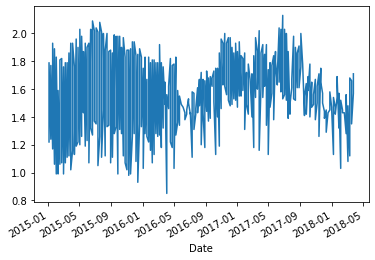

In [5]:
albany_df = df[ df["region"] == 'Albany']
albany_df.set_index('Date', inplace = True)
albany_df["AveragePrice"].plot()

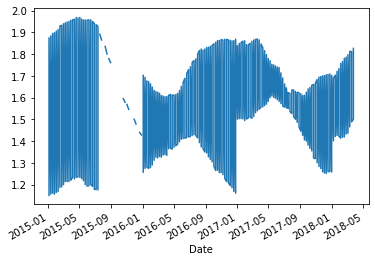

In [6]:
albany_df["AveragePrice"].rolling(25).mean().plot()

Something went wrong, since the graph looks weird

In [7]:
albany_df.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

So we see that the dates are not in chronological order

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


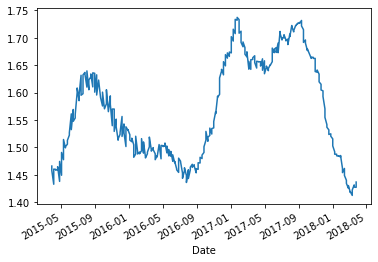

In [8]:
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(25).mean().plot()

In [9]:
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
albany_df.tail(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [11]:
albany_df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


In [12]:
albany_df.dropna().head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600


In [13]:
# To not have a warning about setting values on copy

albany_df = df.copy()[ df['region'] == 'Albany']
albany_df.set_index('Date', inplace=True)
albany_df.sort_index()
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

In [14]:
list(set(df['region'].values.tolist())) ## To messy

['Tampa',
 'Atlanta',
 'Roanoke',
 'SanFrancisco',
 'Jacksonville',
 'CincinnatiDayton',
 'Boise',
 'PhoenixTucson',
 'HartfordSpringfield',
 'Midsouth',
 'MiamiFtLauderdale',
 'Houston',
 'NorthernNewEngland',
 'BaltimoreWashington',
 'NewOrleansMobile',
 'West',
 'Pittsburgh',
 'LosAngeles',
 'WestTexNewMexico',
 'Denver',
 'Syracuse',
 'Albany',
 'SouthCarolina',
 'Northeast',
 'Indianapolis',
 'LasVegas',
 'SouthCentral',
 'BuffaloRochester',
 'Columbus',
 'GrandRapids',
 'Philadelphia',
 'Southeast',
 'Sacramento',
 'Detroit',
 'Spokane',
 'StLouis',
 'Plains',
 'Nashville',
 'TotalUS',
 'Portland',
 'RichmondNorfolk',
 'RaleighGreensboro',
 'Louisville',
 'Boston',
 'California',
 'NewYork',
 'Orlando',
 'Charlotte',
 'DallasFtWorth',
 'Chicago',
 'SanDiego',
 'GreatLakes',
 'Seattle',
 'HarrisburgScranton']

In [15]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
graph_df = pd.DataFrame()

for region in df["region"].unique()[:25]:   #Causes RAM to explode
   print(region)
   region_df = df[df['region']== region].copy()
   region_df.set_index('Date', inplace=True)
   region_df.sort_index(inplace=True)

   region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

   if graph_df.empty:
       graph_df = region_df[[f"{region}_price25ma"]]    # This will return a dataframe. just one [] would return a series
   else:
       graph_df = graph_df.join(region_df[f"{region}_price25ma"])


Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston


To solve the exploding RAM problem, we choose either one of the types to avoid the clashing index problem. The results come instantly

In [7]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/avocado.csv')
df = df.copy()[df['type'] == 'organic']

df['Date'] = pd.to_datetime(df['Date']) #Convert to Datetime
df.sort_values('Date', ascending=True, inplace=True)

graph_df = pd.DataFrame()

for region in df["region"].unique():   #Causes RAM to explode
   print(region)
   region_df = df[df['region']== region].copy()
   region_df.set_index('Date', inplace=True)
   region_df.sort_index(inplace=True)

   region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

   if graph_df.empty:
       graph_df = region_df[[f"{region}_price25ma"]]    # This will return a dataframe. just one [] would return a series
   else:
       graph_df = graph_df.join(region_df[f"{region}_price25ma"])

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


In [ ]:
df.head()

In [8]:
graph_df.tail()

,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,Orlando_price25ma,Southeast_price25ma,Boise_price25ma,MiamiFtLauderdale_price25ma,NorthernNewEngland_price25ma,BaltimoreWashington_price25ma,Midsouth_price25ma,Tampa_price25ma,West_price25ma,Northeast_price25ma,Atlanta_price25ma,Nashville_price25ma,TotalUS_price25ma,Syracuse_price25ma,WestTexNewMexico_price25ma,Jacksonville_price25ma,Charlotte_price25ma,Sacramento_price25ma,GrandRapids_price25ma,Roanoke_price25ma,Denver_price25ma,SanDiego_price25ma,GreatLakes_price25ma,RichmondNorfolk_price25ma,DallasFtWorth_price25ma,SanFrancisco_price25ma,HarrisburgScranton_price25ma,Pittsburgh_price25ma,RaleighGreensboro_price25ma,Seattle_price25ma,HartfordSpringfield_price25ma,Portland_price25ma,CincinnatiDayton_price25ma,SouthCarolina_price25ma,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,1.8728,1.7116,2.0512,1.7140,1.6280,1.5836,1.7252,1.7204,1.8620,1.6940,1.8660,1.7296,1.7144,1.3156,1.8708,1.9856,2.0548,1.7956,1.3388,1.6136,1.7084,2.0276,1.5656,1.5244,1.5708,1.9960,1.5004,1.4004,2.1920,1.9684,1.9408,2.0144,1.7752,1.6184,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,1.8512,1.6868,2.0176,1.7068,1.6224,1.5772,1.7084,1.7104,1.8220,1.6860,1.8288,1.7036,1.6940,1.3004,1.8372,1.9684,2.0180,1.7904,1.3232,1.5972,1.6880,1.9988,1.5460,1.5016,1.5536,1.9968,1.4972,1.3976,2.1556,1.9044,1.9336,1.9636,1.7564,1.5952,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,1.8004,1.6484,1.9836,1.6904,1.6264,1.5732,1.6924,1.6916,1.7912,1.6868,1.7844,1.6688,1.6748,1.2932,1.8052,1.9264,1.9764,1.7896,1.3200,1.5828,1.6708,1.9668,1.5248,1.4920,1.5340,2.0016,1.4956,1.3968,2.1196,1.8516,1.9412,1.9192,1.7216,1.5612,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,1.7712,1.6156,1.9520,1.6692,1.6284,1.5684,1.6768,1.6776,1.7644,1.6852,1.7412,1.6300,1.6588,1.2848,1.7772,1.8876,1.9444,1.7812,1.3148,1.5624,1.6700,1.9476,1.5012,1.4744,1.5196,1.9936,1.4956,1.3944,2.1016,1.8116,1.9436,1.8780,1.6860,1.5312,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,1.7352,1.5820,1.9128,1.6392,1.6312,1.5568,1.6592,1.6484,1.7304,1.6804,1.6936,1.6004,1.6428,1.2700,1.7472,1.8380,1.9024,1.7720,1.3108,1.5532,1.6568,1.9268,1.4912,1.4672,1.5100,1.9776,1.4900,1.3936,2.0624,1.7564,1.9448,1.8300,1.6720,1.5004,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


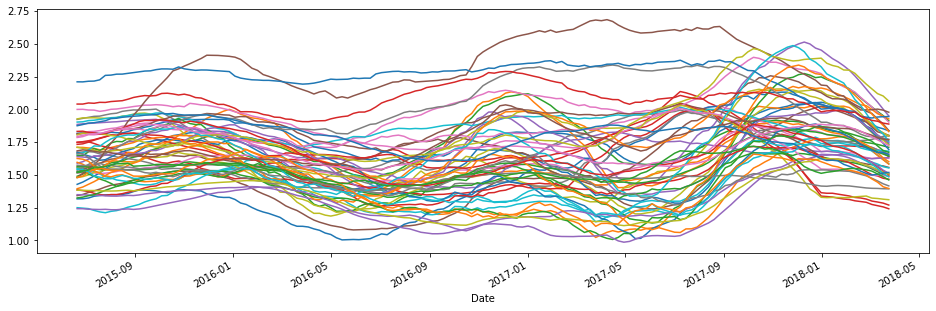

In [13]:
graph_df.dropna().plot(figsize=(16,5), legend=False)